In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os

### Handle File Names and Plot Function

In [45]:
root = "/home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/"
file_type = ".csv"
eval_name = lambda caption_type, recall_type: os.path.join(root ,f"{caption_type}_{recall_type}{file_type}")

#possible prefixes
human_caption = "human_captions_query"
catr_caption = "catr_captions_query"
merged_human_caption = "merged_human_caption_catr_captions_query"
merged_sequences_captions = "merged_sequences_catr_captions_query"

query_type_list = [human_caption, catr_caption, merged_human_caption, merged_sequences_captions]

#possible suffixes
fei_fei_recall = "feifei_johnson_recall"
ade20k_category_recall = "ade20k_category_recall"
feifei_recall_label = "Fei Fei /Johnson based Recall"
category_recall_label = "ADE20K Category Based Recall"


def plot_recall(df, recall_list : list = [1, 5 , 10], 
                title="Image Retrieval Performance with ADE20K pictures (50 Images gallery)",
                y_label = "ADE20K Category Based Recall",
                x_label = "Similarity Threshold"):

    mean_rank = round(df['mean_rank'][0], 2)
    average_similarity = round(df['average_similarity'][0]*100, 2)
    for r in recall_list:
        column_name = f"recall_at_{r}"
        if column_name in df.columns:
            plt.plot(df["threshold"][1:], df[f"recall_at_{r}"][1:], label=f"@{r}")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(f"{title}\nMean Rank gold recommendation:{mean_rank}\nAverage Similarity gold Recommendation: {average_similarity}%")
    plt.legend(loc='best')
    plt.show()

def read_frame(name):
    print("Opening:", file_name)
    df = pd.read_csv(name, sep=",", header=0)
    return df.drop(df.columns[0], axis=1)

# I) Baseline System with Sentence-Bert

## ADE20K Metrics (Gallery Size of 50 Images)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_feifei_johnson_recall.csv


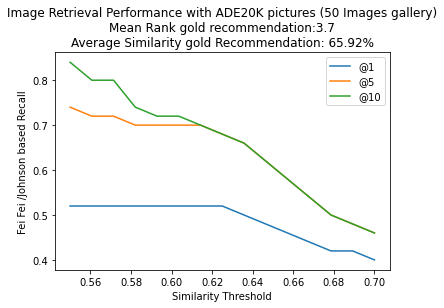

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_feifei_johnson_recall.csv


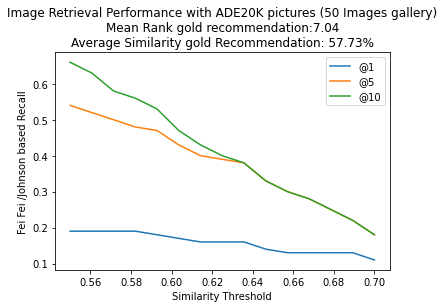

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


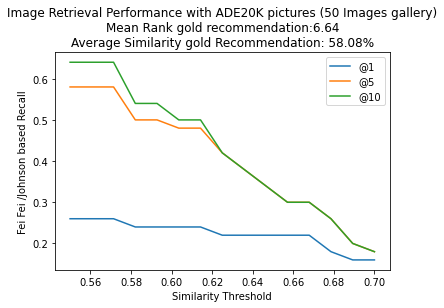

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_feifei_johnson_recall.csv


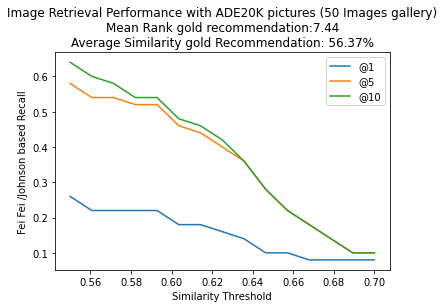

In [24]:
for query_type in query_type_list:
    file_name = eval_name(query_type, fei_fei_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_ade20k_category_recall.csv


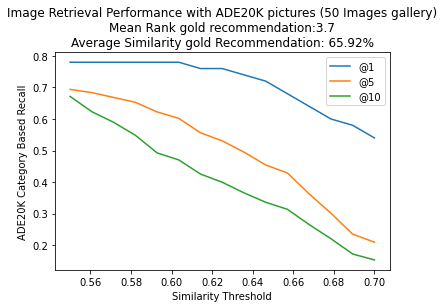

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_ade20k_category_recall.csv


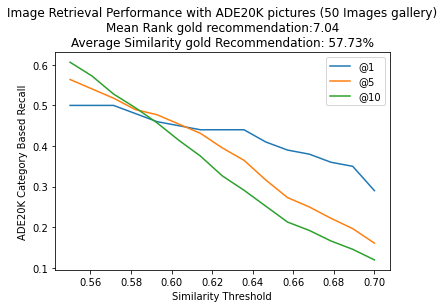

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_ade20k_category_recall.csv


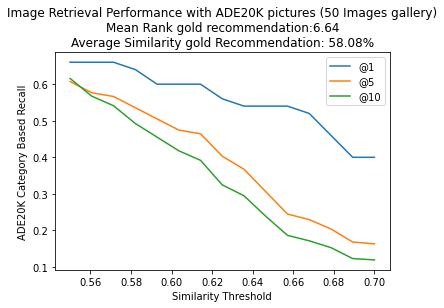

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_ade20k_category_recall.csv


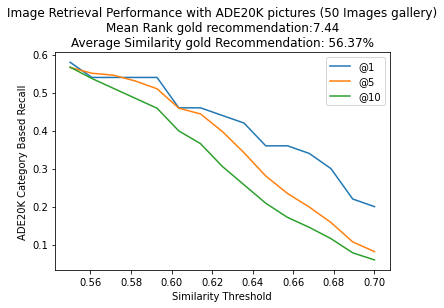

In [25]:
for query_type in query_type_list:
    file_name = eval_name(query_type, ade20k_category_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=category_recall_label)
# Explanation why the recall @10 and @20 are the same? Short answer: the gallery for retrieval is just too small 
# Long Answer:
# Well, we only consider certains values over a threshold
# but we also consider as relevant the number of a given category for a test.
# for example if I only have the 5 images of a bathroom , if I consider recall at 10 or 20, it doesn't matter much, 
# all the relevant have been picked during the recall @5 it does not influence the score at 10 or 20, as we can't
# retrieve 10 or 20 bathroom pictures. The only to see other differences would be to set higher threshold values.

## Visual Genome Metrics (Images also contained in MSCOCO)

#########################################################################

GALLERY SIZE 50.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_human_captions_query_feifei_johnson_recall.csv


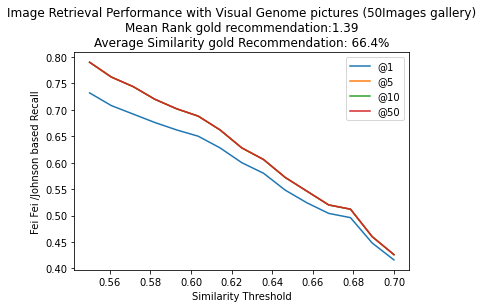

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_catr_captions_query_feifei_johnson_recall.csv


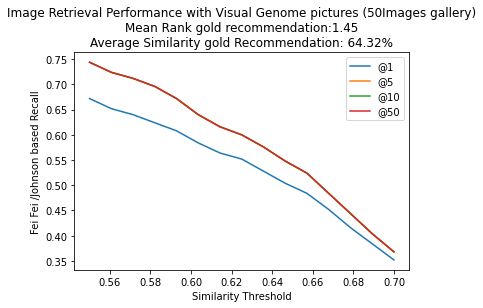

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


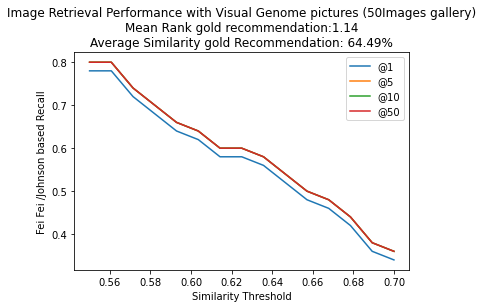

#########################################################################

GALLERY SIZE 150.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_human_captions_query_feifei_johnson_recall.csv


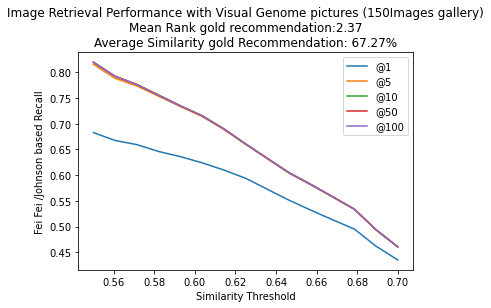

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_catr_captions_query_feifei_johnson_recall.csv


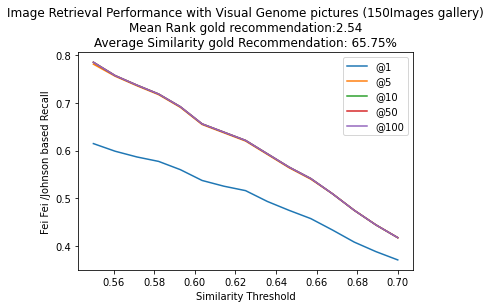

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


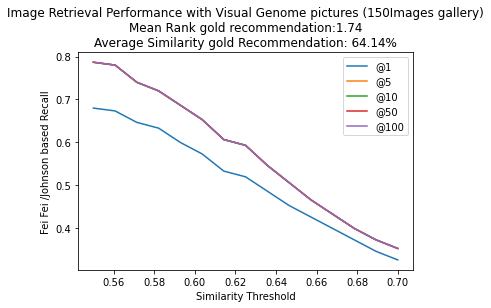

#########################################################################

GALLERY SIZE 1000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_human_captions_query_feifei_johnson_recall.csv


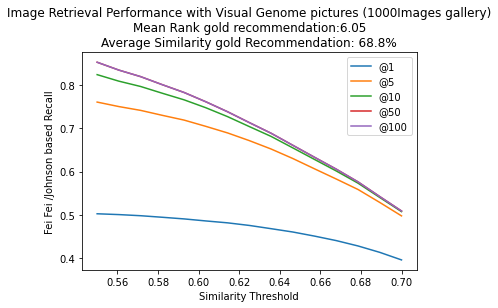

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_catr_captions_query_feifei_johnson_recall.csv


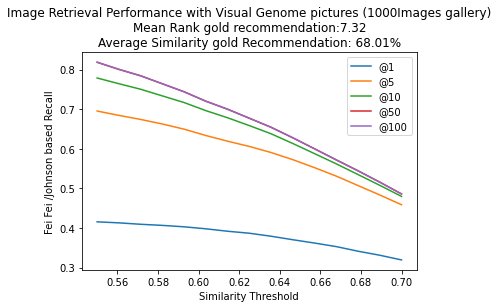

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


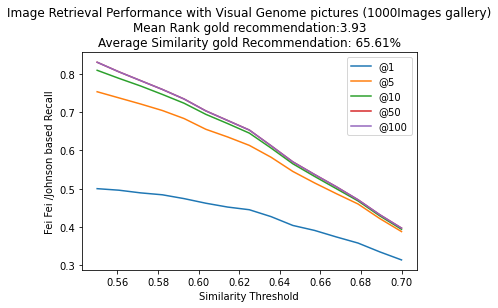

#########################################################################

GALLERY SIZE 5000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_human_captions_query_feifei_johnson_recall.csv


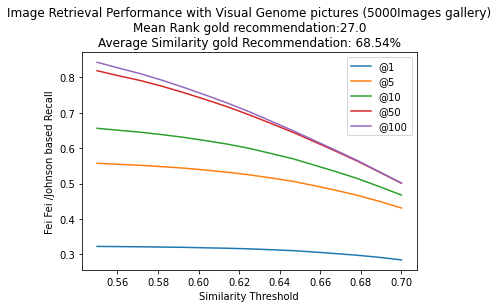

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_catr_captions_query_feifei_johnson_recall.csv


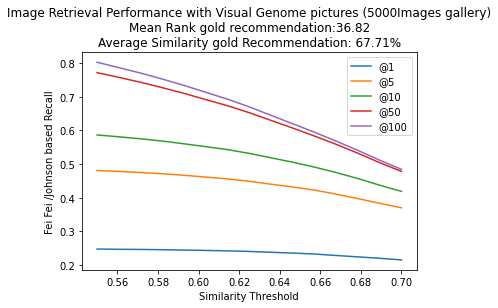

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


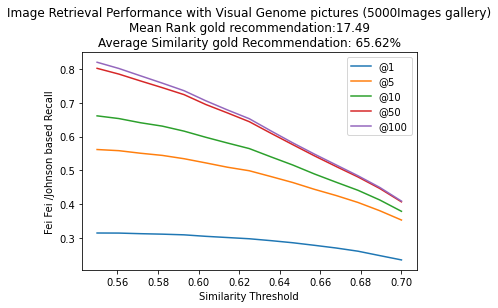

In [46]:


vg_human_caption = lambda gallery_size: f"vg_{gallery_size}_human_captions_query"
vg_catr_caption = lambda gallery_size: f"vg_{gallery_size}_catr_captions_query"
vg_merged_human_caption = lambda gallery_size: f"vg_{gallery_size}_merged_human_caption_catr_captions_query"

get_query_type_list = lambda gallery_size: [vg_human_caption(gallery_size), vg_catr_caption(gallery_size), vg_merged_human_caption(gallery_size)]

#TODO 50 and 5000
gallery_size_list = [50, 150, 1000, 5000]

for size in gallery_size_list:
    print("#########################################################################\n")
    query_type_list = get_query_type_list(size)
    print(f"GALLERY SIZE {size}.\n")
    for query_type in query_type_list:
        title=f"Image Retrieval Performance with Visual Genome pictures ({size}Images gallery)"
        file_name = eval_name(query_type, fei_fei_recall)
        df = read_frame(file_name)
        plot_recall(df, y_label=feifei_recall_label, recall_list=[1, 5,  10, 50, 100], title=title)


# 2) Scene Graph Based System

## Visual Genome Metrics (Images also contained in MSCOCO)

#########################################################################

GALLERY SIZE 50.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_50_graph_query_feifei_johnson_recall.csv


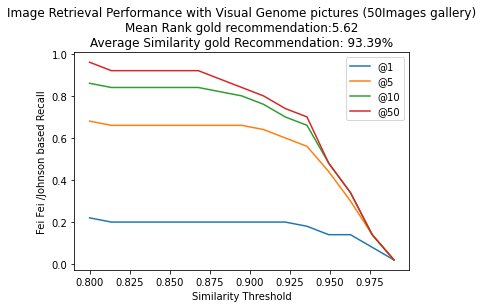

#########################################################################

GALLERY SIZE 150.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_150_graph_query_feifei_johnson_recall.csv


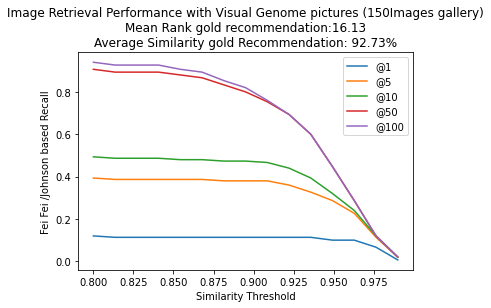

#########################################################################

GALLERY SIZE 1000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_graph_query_feifei_johnson_recall.csv


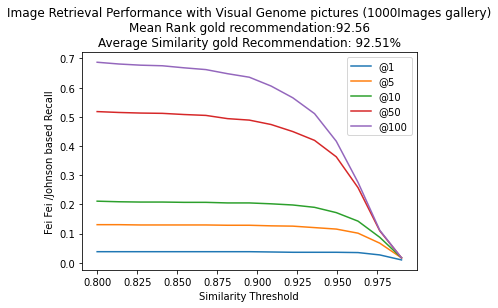

#########################################################################

GALLERY SIZE 5000.

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_graph_query_feifei_johnson_recall.csv


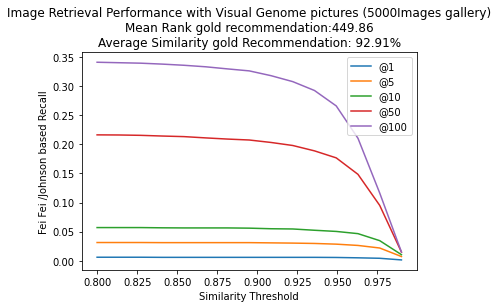

In [47]:
vg_graph_query = lambda gallery_size: f"vg_{gallery_size}_graph_query"


gallery_size_list = [50, 150, 1000, 5000]
query_type_list = [vg_graph_query(size) for size in gallery_size_list ]

for size in gallery_size_list:
    print("#########################################################################\n")
    query_type = vg_graph_query(size)
    print(f"GALLERY SIZE {size}.\n")
    title=f"Image Retrieval Performance with Visual Genome pictures ({size}Images gallery)"
    file_name = eval_name(query_type, fei_fei_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label, recall_list=[1, 5,  10, 50, 100], title=title)


## Remarks:
The model used to train the Image Retrieval System is based on the Causal TDE, MOTIFS Model, SUM Fusion Model trained by Kaihua Tang et al. (https://arxiv.org/pdf/2002.11949.pdf). 

The pipeline for the image retrieval part was partly incomplete, as the author missed to secure properly the corresponding code (See the author comment under https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/blob/master/maskrcnn_benchmark/image_retrieval/S2G-RETRIEVAL.md).

My pull request addresses many issues and make the running of the pipeline only a configuration topic. (https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch/pull/156)

However, please note that I do not rely on the author evaluation function, as it was no using a normalized score to calculate the similarity between keys and queries.

I used a modified version of this with my own logic to count the recall.

While the results differs, the mean rank values are on the same scale. I suspect the author made an error when reporting the values as the the values for recall @10 in my own experiment (21.1% for 1000 and 5.7% for 5000) are really near to the authors values @20.



| Image Retrieval (Sentence To Graph)                            |      |       |           |         |         |           |
|----------------------------------------------------------------|------|-------|-----------|---------|---------|-----------|
| Gallery                                                        | 1000 |       |           | 5000    |         |           |
| Recall @ in %                                                  | R@20 | R@100 | Mean Rank | R@20    | R@100   | Mean Rank |
| Reported Performance(Probably No Similarity Threshold applied) | 17   | 53.6  | 91        | 5.2     | 18.9    | 425       |
| Own Testing and Metrics(No Similarity Threshold applied)       | 31.4 | 69.2  | 92        | 10.6319 | 34.2227 | 449       |

In [54]:
q = vg_graph_query(1000)
file_name = eval_name(q, fei_fei_recall)
df = read_frame(file_name)
df

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_1000_graph_query_feifei_johnson_recall.csv


,recall_at_1,recall_at_2,recall_at_3,recall_at_4,recall_at_5,recall_at_10,recall_at_20,recall_at_50,recall_at_100,mean_rank,average_similarity,threshold
0,0.038229,0.061368,0.081489,0.109658,0.130785,0.211268,0.314889,0.521127,0.692153,92.564384,0.925145,NaN
1,0.038229,0.061368,0.081489,0.109658,0.130785,0.211268,0.313883,0.518109,0.687123,92.564384,0.925145,0.800000
2,0.038229,0.061368,0.081489,0.109658,0.130785,0.209256,0.311871,0.515091,0.681087,92.564384,0.925145,0.813571
3,0.038229,0.061368,0.081489,0.108652,0.129779,0.208249,0.310865,0.513078,0.677062,92.564384,0.925145,0.827143
4,0.038229,0.061368,0.081489,0.108652,0.129779,0.208249,0.309859,0.512072,0.675050,92.564384,0.925145,0.840714
5,0.038229,0.061368,0.081489,0.108652,0.129779,0.207243,0.308853,0.508048,0.668008,92.564384,0.925145,0.854286
6,0.038229,0.061368,0.081489,0.108652,0.129779,0.207243,0.308853,0.505030,0.661972,92.564384,0.925145,0.867857
7,0.038229,0.061368,0.081489,0.108652,0.128773,0.205231,0.305835,0.493964,0.647887,92.564384,0.925145,0.881429
8,0.038229,0.061368,0.081489,0.108652,0.128773,0.205231,0.302817,0.488934,0.635815,92.564384,0.925145,0.895000
9,0.037223,0.060362,0.080483,0.107646,0.126761,0.202213,0.295775,0.473843,0.605634,92.564384,0.925145,0.908571


In [53]:
q = vg_graph_query(5000)
file_name = eval_name(q, fei_fei_recall)
df = read_frame(file_name)
df

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/vg_5000_graph_query_feifei_johnson_recall.csv


,recall_at_1,recall_at_2,recall_at_3,recall_at_4,recall_at_5,recall_at_10,recall_at_20,recall_at_50,recall_at_100,mean_rank,average_similarity,threshold
0,0.006018,0.015246,0.021063,0.026279,0.031294,0.056971,0.106319,0.216650,0.342227,449.85556,0.929087,NaN
1,0.006018,0.015246,0.021063,0.026279,0.031294,0.056971,0.106118,0.216249,0.341023,449.85556,0.929087,0.800000
2,0.006018,0.015246,0.021063,0.026279,0.031294,0.056971,0.106118,0.216048,0.340221,449.85556,0.929087,0.813571
3,0.006018,0.015246,0.021063,0.026279,0.031294,0.056971,0.106118,0.215446,0.339418,449.85556,0.929087,0.827143
4,0.005817,0.015045,0.020863,0.026078,0.031093,0.056570,0.105517,0.214243,0.337813,449.85556,0.929087,0.840714
5,0.005817,0.015045,0.020863,0.026078,0.031093,0.056369,0.105115,0.213240,0.335807,449.85556,0.929087,0.854286
6,0.005817,0.015045,0.020863,0.026078,0.031093,0.056369,0.104313,0.211033,0.333200,449.85556,0.929087,0.867857
7,0.005817,0.015045,0.020863,0.026078,0.031093,0.056369,0.104112,0.209027,0.329589,449.85556,0.929087,0.881429
8,0.005817,0.015045,0.020863,0.026078,0.031093,0.055968,0.103310,0.207422,0.326179,449.85556,0.929087,0.895000
9,0.005817,0.014644,0.020461,0.025677,0.030692,0.054965,0.101103,0.203210,0.317954,449.85556,0.929087,0.908571
